# Classification Trees and Random Forest Classification (supermarket data)

In this notebook, we will use Classification Tree and Random Forest classifiers to predict supermarket brands based on various features like location, population density, brand, and more. We will evaluate the models using feature importance, confusion matrices, and ROC curves.

## Libraries and settings

In [5]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest/grades


## Import supermarkets data

In [6]:
# Read and select variables
columns = ['Student_ID','Branch','Grade','Study_Hours','IQ','Age','Weight','Parents_Income'
          ]
df_grades= pd.read_csv("../Data/student_grades_data.csv", 
                                   sep=",", 
                                   encoding="utf-8")[columns]

# Number of rows and columns
print(df_grades.shape)

# Brand to upper case letters
df_grades['Branch'] = df_grades['Branch'].str.upper()

# First records
# First records
df_grades.head(5)

(10000, 8)


,Student_ID,Branch,Grade,Study_Hours,IQ,Age,Weight,Parents_Income
0,Student_0001,HISTORY,F,54,132,19,68,50043
1,Student_0002,HISTORY,D,24,139,24,52,38024
2,Student_0003,ENGINEERING,C,35,158,25,86,33798
3,Student_0004,MATHEMATICS,F,35,104,20,85,118113
4,Student_0005,BIOLOGY,C,57,154,24,82,54247


## Count and remove missing values

In [7]:
# Count missing values
print(df_grades.isna().sum())

# Remove missing values
df_grades = df_grades.dropna()
df_grades

Student_ID        0
Branch            0
Grade             0
Study_Hours       0
IQ                0
Age               0
Weight            0
Parents_Income    0
dtype: int64


,Student_ID,Branch,Grade,Study_Hours,IQ,Age,Weight,Parents_Income
0,Student_0001,HISTORY,F,54,132,19,68,50043
1,Student_0002,HISTORY,D,24,139,24,52,38024
2,Student_0003,ENGINEERING,C,35,158,25,86,33798
3,Student_0004,MATHEMATICS,F,35,104,20,85,118113
4,Student_0005,BIOLOGY,C,57,154,24,82,54247
...,...,...,...,...,...,...,...,...
9995,Student_9996,MATHEMATICS,A,31,133,22,84,137234
9996,Student_9997,MATHEMATICS,E,44,127,24,66,137616
9997,Student_9998,BIOLOGY,C,34,137,20,66,141477
9998,Student_9999,MATHEMATICS,A,49,151,25,69,120200


## Subset with selected brands

In [8]:
df_sub = df_grades.loc[df_grades['Branch'].isin(['MATHEMATICS', 'BIOLOGY'])]
print(df_sub.shape)
df_sub.head()


(4005, 8)


,Student_ID,Branch,Grade,Study_Hours,IQ,Age,Weight,Parents_Income
3,Student_0004,MATHEMATICS,F,35,104,20,85,118113
4,Student_0005,BIOLOGY,C,57,154,24,82,54247
5,Student_0006,BIOLOGY,A,32,91,25,50,81447
6,Student_0007,BIOLOGY,B,20,131,24,71,105561
8,Student_0009,BIOLOGY,A,55,121,22,52,112086


## Pivot table

In [9]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df_sub[['Grade',
                       'Study_Hours',
                       'IQ',
                       'Branch',
                       'Age',
                       'Weight',
                       'Parents_Income']],
                index=['Grade'],
                values=['Study_Hours', 'IQ','Age','Weight','Parents_Income'],
                aggfunc=(np.mean, 'count')).round(0)

Age          IQ        Parents_Income          Study_Hours        \
      count  mean count   mean          count     mean       count  mean   
Grade                                                                      
A       630  22.0   630  120.0            630  85821.0         630  30.0   
B       680  21.0   680  121.0            680  86957.0         680  30.0   
C       673  22.0   673  119.0            673  86353.0         673  30.0   
D       688  22.0   688  118.0            688  85081.0         688  31.0   
E       664  21.0   664  120.0            664  85544.0         664  29.0   
F       670  22.0   670  121.0            670  82859.0         670  30.0   

      Weight        
       count  mean  
Grade               
A        630  75.0  
B        680  75.0  
C        673  75.0  
D        688  75.0  
E        664  75.0  
F        670  75.0

## Classification Tree
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [10]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['Study_Hours', 'IQ','Age','Weight','Parents_Income']],
                                                    df_sub['Grade'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
      Study_Hours   IQ  Age  Weight  Parents_Income
5310           17   85   25      61           56015
6029           44  121   20      72          134109
4270           52   89   21      58           74512
1033           14   89   21      58          105444
7342           11  129   25      92           81922 

y_train:
5310    E
6029    A
4270    E
1033    B
7342    B
Name: Grade, dtype: object


### Fit the classification tree model and make predictions

In [11]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=5)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['A', 'C', 'D', 'E', 'D', 'D', 'C', 'A', 'F', 'E', 'B', 'D', 'E',
       'B', 'C', 'E', 'F', 'F', 'B', 'A', 'A', 'F', 'E', 'D', 'F', 'F',
       'D', 'D', 'D', 'B', 'C', 'D', 'E', 'F', 'A', 'B', 'D', 'E', 'B',
       'C', 'D', 'A', 'C', 'E', 'B', 'E', 'B', 'D', 'F', 'D', 'B', 'F',
       'D', 'D', 'D', 'E', 'E', 'E', 'A', 'F', 'F', 'D', 'A', 'D', 'D',
       'A', 'E', 'E', 'F', 'D', 'D', 'D', 'E', 'D', 'D', 'F', 'F', 'D',
       'C', 'B', 'A', 'A', 'C', 'D', 'D', 'D', 'E', 'D', 'E', 'F', 'A',
       'C', 'F', 'B', 'F', 'F', 'D', 'C', 'D', 'E', 'C', 'D', 'D', 'D',
       'B', 'E', 'C', 'D', 'E', 'E', 'D', 'A', 'D', 'E', 'D', 'D', 'D',
       'E', 'C', 'D', 'D', 'D', 'D', 'F', 'D', 'B', 'D', 'B', 'E', 'C',
       'D', 'D', 'F', 'C', 'D', 'A', 'B', 'A', 'C', 'A', 'D', 'C', 'E',
       'D', 'E', 'D', 'E', 'F', 'F', 'D', 'D', 'E', 'D', 'F', 'C', 'D',
       'E', 'D', 'C', 'E', 'A', 'A', 'D', 'D', 'F', 'D', 'A', 'E', 'D',
       'F', 'E', 'A', 'F', 'E', 'D', 'D', 'B', 'D', 'E', 'C', 'B

### Show confusion matrix and classification report

In [12]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[ 8  9 12 52 35 23]
 [13  6 13 49 25 28]
 [19 15 19 39 16 26]
 [ 8 16 18 46 20 12]
 [ 9 15 19 44 16 19]
 [15 16 24 46 24 27]] 

Classification report
              precision    recall  f1-score   support

           A       0.11      0.06      0.08       139
           B       0.08      0.04      0.06       134
           C       0.18      0.14      0.16       134
           D       0.17      0.38      0.23       120
           E       0.12      0.13      0.12       122
           F       0.20      0.18      0.19       152

    accuracy                           0.15       801
   macro avg       0.14      0.16      0.14       801
weighted avg       0.14      0.15      0.14       801



### Print text representation of the classification tree

In [13]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- IQ <= 133.50
|   |--- Parents_Income <= 29599.00
|   |   |--- IQ <= 125.50
|   |   |   |--- Study_Hours <= 9.50
|   |   |   |   |--- Parents_Income <= 21386.50
|   |   |   |   |   |--- class: F
|   |   |   |   |--- Parents_Income >  21386.50
|   |   |   |   |   |--- class: A
|   |   |   |--- Study_Hours >  9.50
|   |   |   |   |--- Study_Hours <= 12.00
|   |   |   |   |   |--- class: B
|   |   |   |   |--- Study_Hours >  12.00
|   |   |   |   |   |--- class: F
|   |   |--- IQ >  125.50
|   |   |   |--- IQ <= 126.50
|   |   |   |   |--- Parents_Income <= 24606.50
|   |   |   |   |   |--- class: D
|   |   |   |   |--- Parents_Income >  24606.50
|   |   |   |   |   |--- class: E
|   |   |   |--- IQ >  126.50
|   |   |   |   |--- Parents_Income <= 21439.50
|   |   |   |   |   |--- class: C
|   |   |   |   |--- Parents_Income >  21439.50
|   |   |   |   |   |--- class: D
|   |--- Parents_Income >  29599.00
|   |   |--- Parents_Income <= 84402.50
|   |   |   |--- Parents_Income <= 81803

## Visualize the classification tree

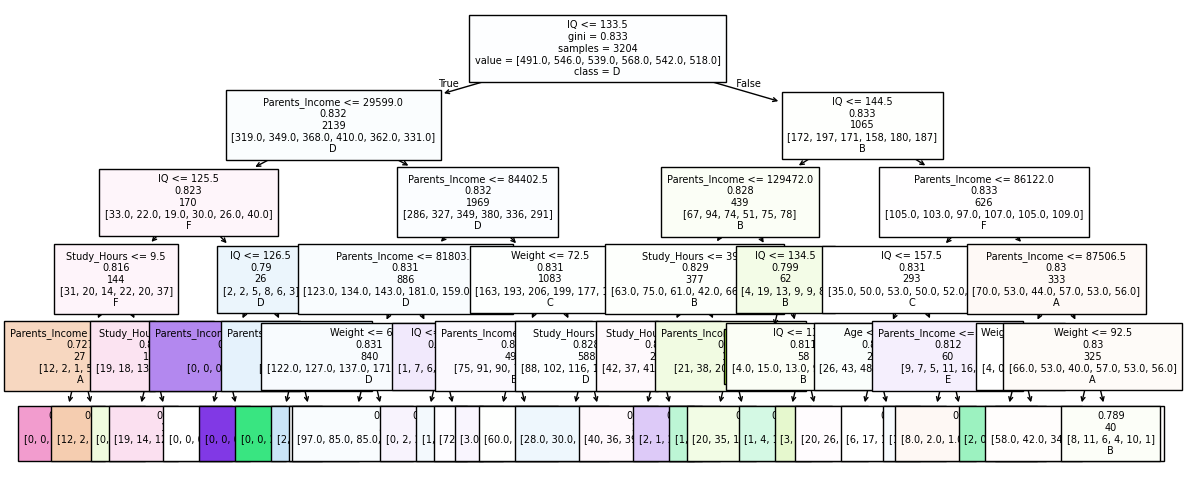

In [14]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(14,6))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['A', 'B', 'C','D','E','F'],
                   filled=True,
                   fontsize=7,
                   label='root')

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [15]:
df_sub = df_grades.loc[df_grades['Grade'].isin(['A', 'B'])]
print(df_sub.shape)
df_sub.head()


(3281, 8)


,Student_ID,Branch,Grade,Study_Hours,IQ,Age,Weight,Parents_Income
5,Student_0006,BIOLOGY,A,32,91,25,50,81447
6,Student_0007,BIOLOGY,B,20,131,24,71,105561
7,Student_0008,ENGINEERING,B,22,154,24,63,66723
8,Student_0009,BIOLOGY,A,55,121,22,52,112086
12,Student_0013,BIOLOGY,B,47,153,20,67,91091


In [16]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['Study_Hours', 'IQ','Age','Weight','Parents_Income']],
                                                        df_sub['Grade'], 
                                                        test_size=0.20, 
                                                        random_state=5)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      Study_Hours   IQ  Age  Weight  Parents_Income
1486           34  103   20      85           55734
9619           39  159   23      72           62258
7564            5  144   23      68          120665
1016           27  133   23      54          113093
8945           19  106   23      83          133792 

y2_train:
1486    B
9619    B
7564    A
1016    B
8945    A
Name: Grade, dtype: object


### Fit the Random Forest Classifier

In [17]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)

# Train the classification tree model
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable
y_pred_rf = rfc.predict(X2_test)

# Crosstab
print('Grade versus predicted grade:', '\n')
df_pred = pd.DataFrame(data={'Grade': y2_test, 
                             'Grade_predicted': y_pred_rf}).reset_index(drop=True)
df_pred

Grade versus predicted grade: 



,Grade,Grade_predicted
0,B,A
1,B,B
2,B,A
3,A,A
4,A,A
...,...,...
652,B,B
653,A,B
654,A,A
655,B,A


### Show confusion matrix and classification report

In [18]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[201 103]
 [238 115]] 

Classification report
              precision    recall  f1-score   support

           A       0.46      0.66      0.54       304
           B       0.53      0.33      0.40       353

    accuracy                           0.48       657
   macro avg       0.49      0.49      0.47       657
weighted avg       0.50      0.48      0.47       657



### Show feature importance

Index(['Parents_Income', 'IQ', 'Weight', 'Study_Hours', 'Age'], dtype='object')
[0.37409499 0.20238337 0.17363508 0.16569732 0.08418924]


<Axes: ylabel='features'>

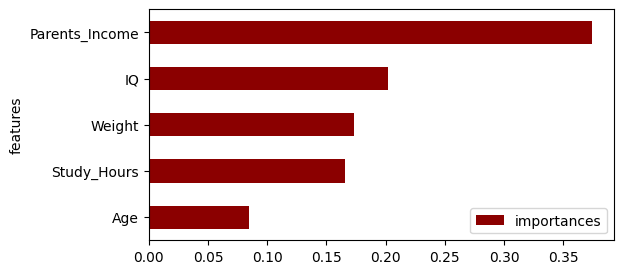

In [19]:
cols = X2_train.columns

# Derive feature importance from the random forest classifier
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### ROC curve and AUC
Purpose of the ROC Curve and AUC
ROC Curve: This plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at different threshold settings for the classifier.
AUC (Area Under the Curve): The AUC score, implicitly calculated here, summarizes the model’s ability to distinguish between classes. A higher AUC value (closer to 1) indicates better model performance.

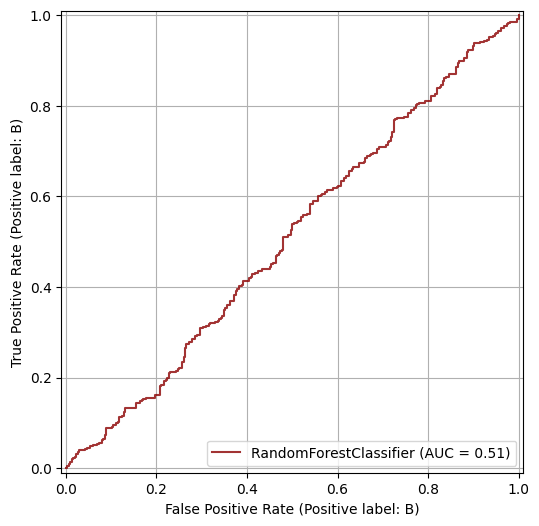

In [20]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,6))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.grid()
plt.show()

An AUC score of 0.49 indicates that the classifier is performing only slightly better than random chance (an AUC of 0.5 would mean the classifier is guessing randomly). Here’s how to interpret this and what it might imply about your model:

Low Discriminative Power: An AUC close to 0.5 suggests that the model has little to no ability to distinguish between classes. This could mean that the features used in the model do not provide sufficient information to separate the classes effectively.

Possibility of Model Improvement:

Feature Engineering: Try adding or engineering new features that may be more predictive.
Parameter Tuning: Experiment with different hyperparameters for the model.
Class Imbalance: If certain classes are underrepresented, consider techniques like oversampling or class weighting to improve class representation.
Check for Data Issues: If the classes overlap significantly or if there are labeling errors, the model might struggle to learn meaningful patterns.

Different Model Architectures: Some models might perform better on multiclass problems. If you’re using a Random Forest Classifier, consider testing other models (like Gradient Boosting or SVM) to see if they yield a higher AUC score.

Summary
An AUC of 0.49 suggests poor classification performance, so adjustments to the model, features, or data preprocessing may be necessary to improve this score.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [21]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 10:46:57
Python Version: 3.11.10
-----------------------------------
